# 로지스틱 회귀 (이진 분류)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/learning_ML/math_for_deep

/content/drive/MyDrive/Colab_Notebooks/learning_ML/math_for_deep


In [ ]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 시그모이드 함수

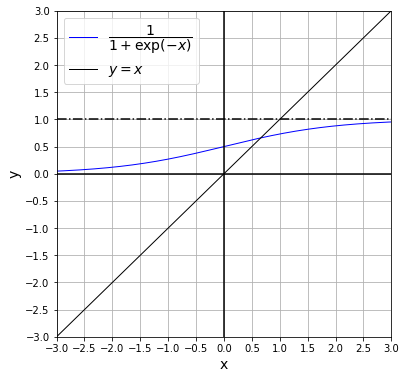

In [ ]:
xx = np.linspace(-6, 6, 500)
yy = 1 / (np.exp(-xx) + 1)

plt.figure(figsize=(6,6))
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks(np.linspace(-3,3,13))
plt.yticks(np.linspace(-3,3,13))
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.plot(xx, yy, c='b', label=r'$\dfrac{1}{1+\exp{(-x)}}$', lw=1)
plt.plot(xx, xx, c='k', label=r'$y = x$', lw=1)
plt.plot([-3,3], [0,0], c='k')
plt.plot([0,0], [-3,3],c='k')
plt.plot([-3,3],[1,1],linestyle='-.',c='k')
plt.legend(fontsize=14)
plt.show()

## 1. 데이터셋

In [ ]:
# 학습용 데이터 준비
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target
print('원본 데이터', x_org.shape, y_org.shape)

원본 데이터 (150, 4) (150,)


In [ ]:
# 데이터 추출
#   클래스 0, 1만
#   항목 sepal_length과 sepal_width만
x_data, y_data = iris.data[:100,:2], iris.target[:100]
print('대상 데이터', x_data.shape, y_data.shape)

대상 데이터 (100, 2) (100,)


In [ ]:
# 더미 변수를 추가
x_data = np.insert(x_data, 0, 1.0, axis=1)
print('더미 변수를 추가 한 후', x_data.shape)

더미 변수를 추가 한 후 (100, 3)


In [ ]:
# 원본 데이터의 크기
print(x_data.shape, y_data.shape)
# 학습 데이터, 검증 데이터로 분할 (셔플도 함께 실시)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 3) (100,)
(70, 3) (30, 3) (70,) (30,)


데이터의 산점도 표시

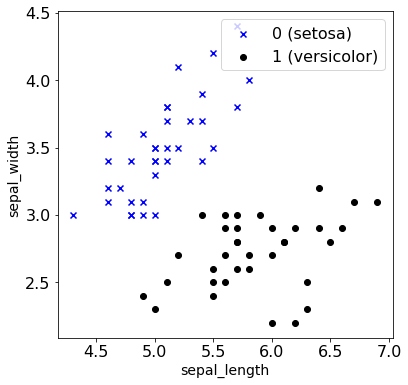

In [ ]:
# 산점도 표시
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

## 2. 모델 생성

In [ ]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [ ]:
# 예측값 계산
def pred(x, w):
    return sigmoid(x @ w)

In [ ]:
# 손실함수(교차 엔트로피 함수)
def cross_entropy(yt, yp):
    # 교차 엔트로피의 계산 (이 단계에서는 벡터)
    ce1 = -(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    # 교차 엔트로피 벡터의 평균값을 계산
    return(np.mean(ce1))

In [ ]:
# 예측 결과의 확률이 0.5 보다 작으면 0, 아니면 1을 반환
def classify(y):
    return np.where(y < 0.5, 0, 1)

In [ ]:
# 모델을 평가하는 함수
from sklearn.metrics import accuracy_score
def evaluate(xt, yt, w):
    
    # 예측값 계산
    yp = pred(xt, w)
    
    # 손실함수 값 계산
    loss = cross_entropy(yt, yp)
    
    # 예측값(확률값)을 0이나 1로 변환
    yp_b = classify(yp)
    
    # 정확도 산출
    score = accuracy_score(yt, yp_b)
    return loss, score

## 3. 모델 훈련

In [ ]:
# 학습용 변수 설정
x = x_train
yt = y_train

# 입력 데이터 x의 표시(더미 데이터를 포함)
print(x[:5])
# 정답 데이터 y의 표시
print(yt[:5])

[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [5.1 5.5 5.5 5.6 5.4 6.3 5.7 6.2 6.  4.8 5.4 5.5 4.9 5.2 4.9 6.4 4.8 5.7
  5.8 6.5 5.4 5.  6.4 4.8 4.6 5.1 4.8 5.1 6.3 5.  5.7 5.6 5.7 4.3 4.6 5.4
  6.6 6.1 5.6 4.6 5.  4.9 5.2 6.9 5.  5.3 5.9 5.  5.7 5.1 4.7 5.8 5.7 5.
  6.2 5.5 5.5 6.  5.7 5.  5.1 5.2 6.1 4.6 6.7 4.9 6.  5.1 5.8 5.6]
 [3.7 2.6 4.2 2.5 3.  2.3 3.  2.9 2.2 3.  3.4 2.5 3.6 2.7 3.  2.9 3.4 2.6
  4.  2.8 3.9 3.4 3.2 3.  3.4 2.5 3.1 3.8 2.5 3.5 4.4 2.7 3.8 3.  3.6 3.7
  2.9 2.8 2.9 3.1 3.5 3.1 3.5 3.1 3.4 3.7 3.  2.3 2.8 3.4 3.2 2.7 2.8 3.3
  2.2 2.4 3.5 2.9 2.9 3.  3.8 4.1 2.8 3.2 3.1 2.4 2.7 3.5 2.6 3. ]]
[[1.  5.1 3.7]
 [1.  5.5 2.6]
 [1.  5.5 4.2]
 [1.  5.6 2.5]
 [1.  5.4 3. ]]
[0 1 0 1 1]


In [ ]:
# 초기 설정

# 표본 수
M = x.shape[0]

# 입력 차원수(더미 변수를 포함)
D = x.shape[1]

# 반복 횟수
iters = 10000

# 학습률
alpha = 0.01

# 초깃값
w = np.ones(D)

# 평가 결과 기록(손실함수와 정확도)
history = np.zeros((0,3))

In [ ]:
# 반복 루프

for k in range(iters):
    
    # 예측값 계산 (8.6.1), (8.6.2)
    yp = pred(x, w)
    
    # 오차 계산 (8.6.4)
    yd = yp - yt
    
    # 경사하강법 적용 (8.6.6)
    w = w - alpha * (x.T @ yd) / M
    
    # 평가 결과 기록
    if ( k % 10 == 0):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack((history, 
            np.array([k, loss, score])))
        print( "iter = %d   loss = %f   accuracy = %f" % (k, loss, score))

iter = 0   loss = 4.493842   accuracy = 0.500000
iter = 10   loss = 3.565375   accuracy = 0.500000
iter = 20   loss = 2.643280   accuracy = 0.500000
iter = 30   loss = 1.762444   accuracy = 0.500000
iter = 40   loss = 1.085375   accuracy = 0.500000
iter = 50   loss = 0.818721   accuracy = 0.500000
iter = 60   loss = 0.770934   accuracy = 0.500000
iter = 70   loss = 0.761053   accuracy = 0.333333
iter = 80   loss = 0.754468   accuracy = 0.200000
iter = 90   loss = 0.747781   accuracy = 0.166667
iter = 100   loss = 0.740979   accuracy = 0.133333
iter = 110   loss = 0.734193   accuracy = 0.166667
iter = 120   loss = 0.727485   accuracy = 0.200000
iter = 130   loss = 0.720875   accuracy = 0.200000
iter = 140   loss = 0.714368   accuracy = 0.266667
iter = 150   loss = 0.707967   accuracy = 0.300000
iter = 160   loss = 0.701670   accuracy = 0.366667
iter = 170   loss = 0.695476   accuracy = 0.433333
iter = 180   loss = 0.689383   accuracy = 0.500000
iter = 190   loss = 0.683389   accuracy = 

## 4, 결과 확인

In [ ]:
# 손실함수의 값과 정확도 점검
print('[초기 상태] 손실함수: %f, 정확도: %f'
      % (history[0,1], history[0,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f'
      % (history[-1,1], history[-1,2]))

[초기 상태] 손실함수: 4.493842, 정확도: 0.500000
[최종 상태] 손실함수: 0.153947, 정확도: 0.966667


In [ ]:
# 검증 데이터를 산점도용으로 준비
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 결정경계를 그리기 위해 x1의 값에서 x2의 값을 계산
def b(x, w):
  return(-(w[0] + w[1] * x)/ w[2])

# 산점도 x1의 최솟값과 최댓값
xl = np.asarray([x[:,1].min(), x[:,1].max()])
yl = b(xl, w)

In [ ]:
# 검증 데이터로 예측하기
import random
preds, trues = [], []
for i in range(10):
  n = random.randrange(0, len(x_test))
  yp = pred(x_test[n], w)
  cp = classify(yp)
  preds.append(int(cp))
  trues.append(y_test[n])
print('예측한 클래스: {}'.format(preds))
print('정답 클래스:   {}'.format(trues))

예측한 클래스: [1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
정답 클래스:   [1, 0, 1, 1, 1, 1, 0, 0, 0, 1]


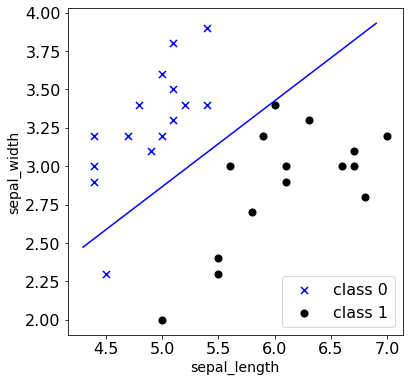

In [ ]:
plt.figure(figsize=(6,6))
# 산점도 표시
plt.scatter(x_t0[:,1], x_t0[:,2], marker='x',
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,1], x_t1[:,2], marker='o',
        c='k', s=50, label='class 1')
# 산점도에 결정경계 직선을 추가
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize=16)
plt.show()

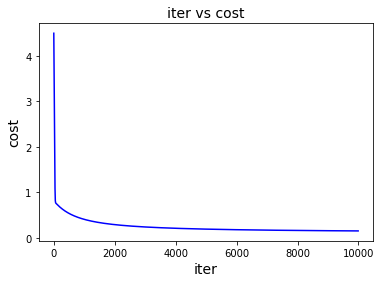

In [ ]:
# 학습 곡선 표시 (손실 함수)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('cost', fontsize=14)
plt.title('iter vs cost', fontsize=14)
plt.show()

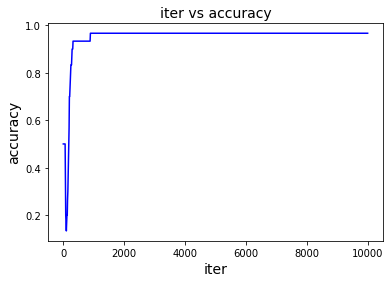

In [ ]:
# 학습 곡선 표시 (정확도)
plt.figure(figsize=(6,4))
plt.plot(history[:,0], history[:,2], 'b')
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

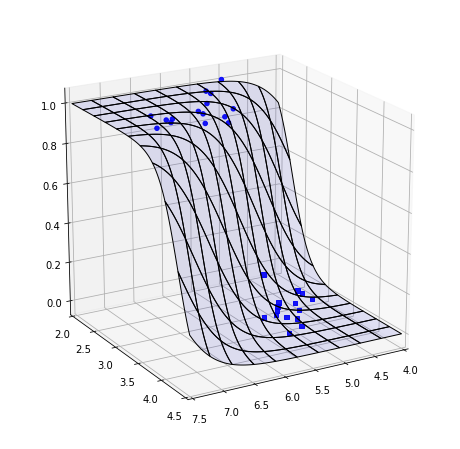

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 7.5, 100)
x2 = np.linspace(2, 4.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.asarray([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
c = pred(xxx, w).reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.1)
ax.scatter(x_t1[:,1], x_t1[:,2], 1, s=20, alpha=0.9, marker='o', c='b')
ax.scatter(x_t0[:,1], x_t0[:,2], 0, s=20, alpha=0.9, marker='s', c='b')
ax.set_xlim(4,7.5)
ax.set_ylim(2,4.5)
ax.view_init(elev=20, azim=60)

# 로지스틱 회귀 (다중 분류)

## 1. 데이터셋

In [ ]:
# 학습용 데이터 준비
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target

# 입력 데이터에 관해서는 sepal length(0)와 petal length(2)만을 추출
x_select = x_org[:,[0,2]]
print('원래 데이터', x_select.shape, y_org.shape)

원래 데이터 (150, 2) (150,)


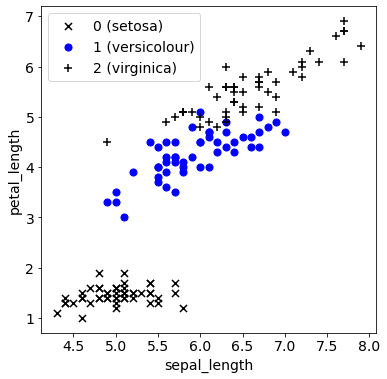

In [ ]:
# 산점도 표시
x_t0 = x_select[y_org == 0]
x_t1 = x_select[y_org == 1]
x_t2 = x_select[y_org == 2]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('petal_length', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
# 더미 변수를 추가
x_all = np.insert(x_select, 0, 1.0, axis=1)

In [ ]:
# y를 One-hot-Vector에
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_work = np.c_[y_org]
y_all_one = ohe.fit_transform(y_work)
print('오리지널', y_org.shape)
print('2차원화', y_work.shape)
print('원핫 인코딩', y_all_one.shape)

오리지널 (150,)
2차원화 (150, 1)
원핫 인코딩 (150, 3)


In [ ]:
# 학습 데이터와 검증 데이터를 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(75, 3) (75, 3) (75,) (75,) (75, 3) (75, 3)


In [ ]:
print('입력 데이터(x)')
print(x_train[:5,:])
print('\n')
print('정답 데이터(y)')
print(y_train[:5])
print('\n')
print('정답 데이터 (원핫 인코딩)')
print(y_train_one[:5,:])

입력 데이터(x)
[[1.  6.3 4.7]
 [1.  7.  4.7]
 [1.  5.  1.6]
 [1.  6.4 5.6]
 [1.  6.3 5. ]]


정답 데이터(y)
[1 1 0 2 2]


정답 데이터 (원핫 인코딩)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


## 2. 모델 생성

In [ ]:
# 학습 대상의 선택
x, yt = x_train, y_train_one

# 소프트맥스 함수 (9.7.3)
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

# 예측값 계산 (9.7.1), (9.7.2)
def pred(x, W):
    return softmax(x @ W)

# 교차 엔트로피 함수 (9.5.1)
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

# 모델을 평가하는 함수
from sklearn.metrics import accuracy_score
def evaluate(x_test, y_test, y_test_one, W):
    # 예측값 계산(확률값)
    yp_test_one = pred(x_test, W)
    # 확률값에서 예측 클래스(0, 1, 2)를 도출
    yp_test = np.argmax(yp_test_one, axis=1)
    # 손실함수 값 계산
    loss = cross_entropy(y_test_one, yp_test_one)
    # 정확도 산출
    score = accuracy_score(y_test, yp_test)
    return loss, score

## 3. 모델 훈련

In [ ]:
# 초기 설정

# 표본 수
M = x.shape[0]
# 입력 차원 수(더미 변수를 포함)
D = x.shape[1]
# 분류 대상 클래스 수
N = yt.shape[1]

# 반복 횟수
iters = 10000

# 학습률
alpha = 0.01

# 가중치 행렬의 초기 설정(모두가 1)
W = np.ones((D, N)) 

# 평가 결과 기록
history = np.zeros((0, 3))

In [ ]:
# 주요 처리
for k in range(iters):
    
    # 예측값 계산 (9.7.1), (9.7.2)
    yp = pred(x, W)
    
    # 오차 계산 (9.7.4)
    yd = yp - yt

    # 가중치 업데이트 (9.7.5)
    W = W - alpha * (x.T @ yd) / M

    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history,
            np.array([k, loss, score])))
        print("epoch = %d   loss = %f   score = %f" 
            % (k, loss, score))

epoch = 0   loss = 1.092628   score = 0.266667
epoch = 10   loss = 1.064035   score = 0.266667
epoch = 20   loss = 1.033466   score = 0.266667
epoch = 30   loss = 1.002645   score = 0.266667
epoch = 40   loss = 0.973510   score = 0.266667
epoch = 50   loss = 0.946309   score = 0.386667
epoch = 60   loss = 0.920978   score = 0.560000
epoch = 70   loss = 0.897402   score = 0.600000
epoch = 80   loss = 0.875452   score = 0.613333
epoch = 90   loss = 0.855005   score = 0.626667
epoch = 100   loss = 0.835942   score = 0.626667
epoch = 110   loss = 0.818152   score = 0.626667
epoch = 120   loss = 0.801532   score = 0.626667
epoch = 130   loss = 0.785986   score = 0.626667
epoch = 140   loss = 0.771424   score = 0.640000
epoch = 150   loss = 0.757767   score = 0.653333
epoch = 160   loss = 0.744941   score = 0.680000
epoch = 170   loss = 0.732877   score = 0.706667
epoch = 180   loss = 0.721513   score = 0.760000
epoch = 190   loss = 0.710795   score = 0.786667
epoch = 200   loss = 0.700670  

## 4. 결과 확인

In [ ]:
# 손실함수의 값과 정확도 점검
print( '[초기 상태] 손실함수: %f, 정확도: %f'
    % (history[0,1], history[0,2]))
print( '[최종 상태] 손실함수: %f, 정확도: %f'
    % (history[-1,1], history[-1,2]))

[초기 상태] 손실함수: 1.092628, 정확도: 0.266667
[최종 상태] 손실함수: 0.197948, 정확도: 0.960000


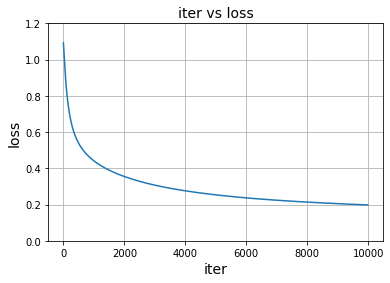

In [ ]:
# 학습 곡선 표시 (손실 함수)
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.ylim(0,1.2)
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

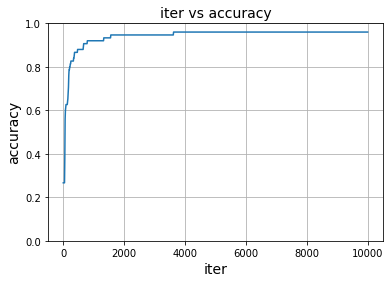

In [ ]:
# 학습 곡선 표시 (정밀도)
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

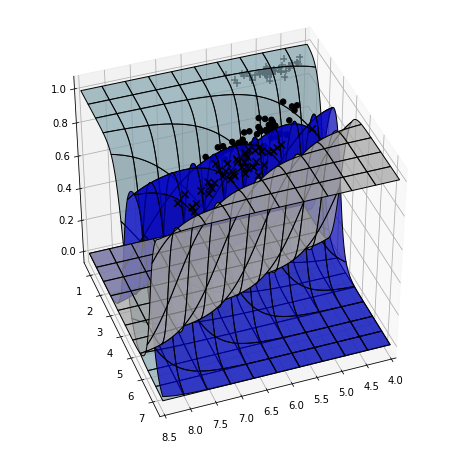

In [ ]:
# 3차원 표시
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 8.5, 100)
x2 = np.linspace(0.5, 7.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.array([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
pp = pred(xxx, W)
c0 = pp[:,0].reshape(xx1.shape)
c1 = pp[:,1].reshape(xx1.shape)
c2 = pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c0, color='lightblue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c1, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c2, color='lightgrey', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.scatter(x_t0[:,0], x_t0[:,1], 1, s=50, alpha=1, marker='+', c='k')
ax.scatter(x_t1[:,0], x_t1[:,1], 1, s=30, alpha=1, marker='o', c='k')
ax.scatter(x_t2[:,0], x_t2[:,1], 1, s=50, alpha=1, marker='x', c='k')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40, azim=70)

In [ ]:
# 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 테스트 데이터로 예측값 계산
yp_test_one = pred(x_test, W)
yp_test = np.argmax(yp_test_one, axis=1)

# 정확도 계산
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp_test)
print('accuracy: %f' % score)

# 혼동행렬의 표시
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp_test))
print(classification_report(y_test, yp_test))

accuracy: 0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75



In [ ]:
# 검증 데이터로 예측하기
import random
preds, tures = [], []
for i in range(10):
  n = random.randrange(0, len(x_test))
  yp = pred(x_test[n], W)
  yp = np.argmax(yp)
  preds.append(yp)
  tures.append(y_test[n])
print('예측한 클래스: {}'.format(preds))
print('정답 클래스:   {}'.format(tures))

예측한 클래스: [0, 2, 2, 2, 2, 0, 0, 2, 0, 1]
정답 클래스:   [0, 2, 2, 2, 2, 0, 0, 2, 0, 1]
